# CMSC320 Final Project: Analyzing Food Price Data
## By Richard Zhou and Daniel Zhu
<!--Rubric: https://cmsc320.github.io/files/cmsc320_f2021_final_rubric.pdf
1. Motivation. Does the tutorial make the reader believe the topic is relevant or important (i) in general and (ii) with respect to data science?
2. Understanding. After reading through the tutorial, does an uninformed reader feel informed about the topic? Would a reader who already knew about the topic feel likes/he learned more about it?
3. Other resources. Does the tutorial link out to other resources (on the web, in books, etc) that would give a lagging reader additional help on specific topics, or an advanced reader the ability to dive more deeply into a specific application area or technique? 2
4. Prose. Does the prose portion of the tutorial actually add to the content of the deliverable?
5. Code. Is the code well written, well documented, reproducible, and does it help the reader understand the tutorial? Does it give good examples of specific techniques?
6. Subjective evaluation. If somebody linked to this tutorial from, say, Hacker News, would people actually read through the entire thing?-->



# Introduction
Food prices are an integral part of the lives of every individual. By looking at food prices, one can gauge the relative economic situation of a nation and see how the average cost of living changes over time. Specifically, due to esource shortages caused by the coronavirus we were curious to see if we could find trends in prices caused by Covid 19 or other significant events.
In this tutorial, we will be examining the changes in food prices over time from 1974 to 2020, examining the average change in price paid for different types of food, from meats such as pork and beef to sweets. Average change in price paid by urban consumers is known as the Consumer Price Index (CPI), measured in percentage relative to a base year (100%) (<a href="www.bls.gov/cpi/">bls.gov</a>). "It is calculated by taking price changes for each item in the predetermined basket of goods and averaging them." (<a href="https://www.investopedia.com/terms/c/consumerpriceindex.asp#:~:text=The%20Consumer%20Price%20Index%20(CPI)%20is%20a%20measure%20that%20examines,of%20goods%20and%20averaging%20them.">investopedia.com</a>) (eg. fruit CPI might include changes in cost of apples, bannanas, fresh and processed fruit, etc). CPI changes are associated with cost of living.<br> <br>
The data comes from <a href="www.ers.usda.gov/data-products/food-price-outlook.aspx.">ers.usda.gov</a> The CPI for food measures the changes in retail price of food items over time. <br> <br>
The data table contains the percent change in CPI annually for various food items (<a href="https://www.investopedia.com/terms/r/reference_base_period.asp">investopedia.com</a>). <br>
##### CPI Annual Percent Change = (CPI(year) - CPI(previous year))/CPI(previous year) <br>
This is simply the change in consumer price of goods by year.

# Getting the Data
For starters, we will want to import some useful python libraries. These libraries will help us analyze and visualize data.

In [1]:
# Useful libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from matplotlib.pyplot import figure

Now we need to get our data. Our data comes from <a href="www.ers.usda.gov/data-products/food-price-outlook.aspx.">ers.usda.gov</a>, "Annual percent changes in selected Consumer Price Indexes, 1974 through 2020." <br> <br> The CPIDataCleaned.xlsx simply removes some of the unnecessary rows and columns (ie. contact info, source info) so the data is read properly when using pandas.read_excel(). You can download the data directly from the cite itself and remove the extra rows and columns in excel or use the provided CPIDataCleaned.xlsx file. <br> <br>

In [2]:
# First, getting the data from https://www.ers.usda.gov/data-products/food-price-outlook.aspx
# We will be looking at the historical CPI to the changes to food prices over time from 1974 to 2020

# CPIDataCleaned is an excel file that removes some of the unnecessary rows/columns from the original dataset

data = pd.read_excel("CPIDataCleaned.xlsx")
data

,Consumer Price Index item,1974,1975,1976,1977,1978,1979,1980,1981,1982,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,All food,14.3,8.5,3.0,6.3,9.9,11.0,8.6,7.8,4.1,...,3.7,2.6,1.4,2.4,1.9,0.3,0.9,1.4,1.9,3.4
1,Food away from home,12.7,9.4,6.8,7.6,9.1,11.1,9.9,9.0,5.4,...,2.3,2.8,2.1,2.4,2.9,2.6,2.3,2.6,3.1,3.4
2,Food at home,14.9,8.2,2.1,5.9,10.5,10.8,8.1,7.2,3.5,...,4.8,2.5,0.9,2.4,1.2,-1.3,-0.2,0.4,0.9,3.5
3,"Meats, poultry, and fish",2.2,8.5,0.9,-0.6,16.7,14.9,3.7,4.1,4.1,...,7.4,3.6,2.1,7.2,1.9,-3.5,-0.1,0.7,1.0,6.3
4,Meats,1.8,8.5,0.2,-2.3,18.6,17.0,2.9,3.6,4.9,...,8.8,3.4,1.2,9.2,3.0,-4.4,-0.6,0.4,1.3,7.4
5,Beef and veal,2.9,1.0,-3.2,-0.7,22.9,27.4,5.7,0.8,1.4,...,10.2,6.4,2.0,12.1,7.2,-6.3,-1.2,1.4,1.6,9.6
6,Pork,-0.5,22.4,1.3,-5.4,12.9,1.6,-3.3,9.3,12.8,...,8.5,0.3,0.9,9.1,-3.9,-4.1,0.6,-0.4,1.2,6.3
7,Other meats,3.1,5.9,5.9,-0.6,17.7,14.7,3.8,4.3,3.0,...,6.4,1.7,-0.1,3.9,4.1,-0.9,-0.9,-0.4,0.9,4.4
8,Poultry,-5.1,10.5,-4.1,0.7,10.4,4.9,5.2,4.1,-1.7,...,2.9,5.5,4.7,2.0,0.4,-2.7,0.2,0.3,-0.3,5.6
9,Fish and seafood,15.3,8.5,11.7,10.8,9.4,9.7,9.2,8.3,3.6,...,7.1,2.4,2.5,5.8,-0.9,-0.7,1.2,2.1,1.6,3.3


You should now have your data stored in a pandas dataframe (called "data" in the example code) as seen above.

Inflation calculator: https://www.bls.gov/data/inflation_calculator.htm - if we want to try to adjust the changes with inflation rates



# Data Cleaning


Let's clean up our data a bit to make it easier to do our analysis. <br> <br>
We'll start by converting our 'Consumer Price Index item' column to our index column.

In [3]:
# convert 'Consumer Price Index item' to index
data.set_index('Consumer Price Index item', inplace=True)

Additionally, you might notice we have columns like "All food" and "Fruits and vegetables" broken in sub categories of "Fresh fruits and vegetables", "fresh fruits", etc. These columns aggregate the data from multiple different rows (ie. "All food" is CPI of all food items, "Fresh fruits and vegetables" includes data from "Fresh Fruit" and "Fresh vegetables").

We want to take a look at the distribution of individual categories, and keeping the aggregated rows will skew the results. We'll move the aggregated data into its own set.

In [4]:
'''
To determine if a column is a subset of another row or not, we can take a look at the original data table (in excel) where
tabs are used to determine if a row belongs under another row
For example
'Fruits and vegetables'
    'Fresh fruits and vegetables'
        'Fresh fruits'
        'Processed vegetables'
    'Processed fruits and vegetables'

'Fruits and vegetables' aggregates 'Fresh fruits and vegetables' and 'Processed fruits and vegetables' (ie. 'Fresh fruits and
vegetables' and 'Processed fruits and vegetables' are a subset under 'Fruits and vegetables')
Similar logic applies for 'Fresh fruits and vegetables' wich includes 'Fresh fruits' and 'Processed vegetables'

The aggregated columns in our dataset are
'All food', 'Food at home', 'Meats, poultry, and fish', 'Meats ', 'Fruits and vegetables', 'Fresh fruits and vegetables'

The non aggregated columns in our dataset are
'Food away from home', 'Beef and veal', 'Pork', 'Other meats', 'Poultry', 'Fish and seafood', 'Eggs', 
'Dairy products', 'Fats and oils', 'Fresh fruits  ', 'Fresh vegetables', 'Processed fruits and vegetables', 'Sugar and sweets',
'Cereals and bakery products', 'Nonalcoholic beverages', 'Other foods'
'''
data_aggregated_rows = data.copy()

# drop the rows we don't want
data_aggregated_rows.drop(labels = [
'Food away from home', 'Beef and veal', 'Pork', 'Other meats', 'Poultry', 'Fish and seafood', 'Eggs', 
'Dairy products', 'Fats and oils', 'Fresh fruits  ', 'Fresh vegetables', 'Processed fruits and vegetables', 'Sugar and sweets',
'Cereals and bakery products', 'Nonalcoholic beverages', 'Other foods'
], inplace=True)

data.drop(labels = ['All food', 'Food at home', 'Meats, poultry, and fish', 'Meats ', 'Fruits and vegetables', 'Fresh fruits and vegetables'
], inplace=True)

# now data_aggregated_rows has the aggregated data rows
# data only has the lowest level rows
data_aggregated_rows.head()

,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Consumer Price Index item,,,,,,,,,,,,,,,,,,,,,
All food,14.3,8.5,3.0,6.3,9.9,11.0,8.6,7.8,4.1,2.1,...,3.7,2.6,1.4,2.4,1.9,0.3,0.9,1.4,1.9,3.4
Food at home,14.9,8.2,2.1,5.9,10.5,10.8,8.1,7.2,3.5,1.0,...,4.8,2.5,0.9,2.4,1.2,-1.3,-0.2,0.4,0.9,3.5
"Meats, poultry, and fish",2.2,8.5,0.9,-0.6,16.7,14.9,3.7,4.1,4.1,-0.7,...,7.4,3.6,2.1,7.2,1.9,-3.5,-0.1,0.7,1.0,6.3
Meats,1.8,8.5,0.2,-2.3,18.6,17.0,2.9,3.6,4.9,-1.2,...,8.8,3.4,1.2,9.2,3.0,-4.4,-0.6,0.4,1.3,7.4
Fruits and vegetables,16.5,3.1,2.6,9.2,11.1,8.0,7.2,12.1,5.4,0.3,...,4.1,-0.6,2.5,1.5,-0.2,0.8,-0.2,0.7,1.0,1.4


In [5]:
data.head()

,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Consumer Price Index item,,,,,,,,,,,,,,,,,,,,,
Food away from home,12.7,9.4,6.8,7.6,9.1,11.1,9.9,9.0,5.4,4.4,...,2.3,2.8,2.1,2.4,2.9,2.6,2.3,2.6,3.1,3.4
Beef and veal,2.9,1.0,-3.2,-0.7,22.9,27.4,5.7,0.8,1.4,-1.5,...,10.2,6.4,2.0,12.1,7.2,-6.3,-1.2,1.4,1.6,9.6
Pork,-0.5,22.4,1.3,-5.4,12.9,1.6,-3.3,9.3,12.8,-0.9,...,8.5,0.3,0.9,9.1,-3.9,-4.1,0.6,-0.4,1.2,6.3
Other meats,3.1,5.9,5.9,-0.6,17.7,14.7,3.8,4.3,3.0,-0.4,...,6.4,1.7,-0.1,3.9,4.1,-0.9,-0.9,-0.4,0.9,4.4
Poultry,-5.1,10.5,-4.1,0.7,10.4,4.9,5.2,4.1,-1.7,1.3,...,2.9,5.5,4.7,2.0,0.4,-2.7,0.2,0.3,-0.3,5.6


Our data has some missing values. Specifically you may notice that there are no entries under processed fruits and vegetables until 1999.

In [6]:
# print the first 10 entries in data['Processed fruits and vegetables'] to show they are missing
print(data.loc['Processed fruits and vegetables'][:10])
print("...")
print(data.loc['Processed fruits and vegetables'][-5:])

1974   NaN
1975   NaN
1976   NaN
1977   NaN
1978   NaN
1979   NaN
1980   NaN
1981   NaN
1982   NaN
1983   NaN
Name: Processed fruits and vegetables, dtype: float64
...
2016   -0.3
2017   -1.6
2018   -0.6
2019    1.1
2020    3.5
Name: Processed fruits and vegetables, dtype: float64


There are a couple of ways of dealing with this. For starters, we could just drop the row entirely. However, it still contains useful data. For now, we'll use mean imputation, meaning we'll take the average CPI of the year and fill in the missing columns that way. This way, the data can still be included when we graph the CPI of all of the data. We may want to handle the missing data differently later however, so we'll specify when that happens.

In [7]:
from sklearn.impute import SimpleImputer

# convert any missing data to np.NaN
data.replace('N/A', np.NaN)

# impute missing values using mean of that year
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

# we'll store it in a new data frame because we might want the original one with the NaN's later
data_mean_impute = pd.DataFrame(imp.fit_transform(data.values), index=data.index, columns = data.columns)

# we can now see the missing data has been replaced by the average value of that year
print(data_mean_impute)
data_mean_impute.loc['Processed fruits and vegetables'][:10]

                                  1974       1975  1976   1977  1978   1979  \
Consumer Price Index item                                                     
Food away from home              12.70   9.400000   6.8   7.60   9.1  11.10   
Beef and veal                     2.90   1.000000  -3.2  -0.70  22.9  27.40   
Pork                             -0.50  22.400000   1.3  -5.40  12.9   1.60   
Other meats                       3.10   5.900000   5.9  -0.60  17.7  14.70   
Poultry                          -5.10  10.500000  -4.1   0.70  10.4   4.90   
Fish and seafood                 15.30   8.500000  11.7  10.80   9.4   9.70   
Eggs                              0.40  -1.800000   9.2  -3.20  -5.4   9.50   
Dairy products                   18.60   3.100000   8.1   2.70   6.8  11.60   
Fats and oils                    41.90  10.700000 -12.5  10.10   9.6   7.90   
Fresh fruits                      8.70   6.800000  -0.2  14.90  19.5  12.40   
Fresh vegetables                  7.30  -1.100000   

1974    15.220000
1975     9.373333
1976     2.500000
1977     7.340000
1978    10.400000
1979     9.780000
1980     7.793333
1981     7.893333
1982     2.960000
1983     1.380000
Name: Processed fruits and vegetables, dtype: float64

In [8]:
# We are transposing the dataframe so we can create a violin plot of it based on a year column.
data_t = data_mean_impute.transpose()
#data_t.columns = data_t.iloc[0]
#data_t.drop(["Consumer Price Index item"], axis = 0, inplace = True)
data_t.head()

Consumer Price Index item,Food away from home,Beef and veal,Pork,Other meats,Poultry,Fish and seafood,Eggs,Dairy products,Fats and oils,Fresh fruits,Fresh vegetables,Processed fruits and vegetables,Sugar and sweets,Cereals and bakery products,Nonalcoholic beverages,Other foods
1974,12.7,2.9,-0.5,3.1,-5.1,15.3,0.4,18.6,41.9,8.7,7.3,15.220000,52.4,29.9,19.3,21.4
1975,9.4,1.0,22.4,5.9,10.5,8.5,-1.8,3.1,10.7,6.8,-1.1,9.373333,26.1,11.3,15.0,12.8
1976,6.8,-3.2,1.3,5.9,-4.1,11.7,9.2,8.1,-12.5,-0.2,4.3,2.500000,-11.3,-2.2,19.6,4.1
1977,7.6,-0.7,-5.4,-0.6,0.7,10.8,-3.2,2.7,10.1,14.9,12.6,7.340000,5.0,1.6,50.6,3.4
1978,9.1,22.9,12.9,17.7,10.4,9.4,-5.4,6.8,9.6,19.5,8.0,10.400000,12.3,9.0,5.8,8.0


# Exploratory Data Analysis
We want to see how the CPI changes for all food so that we have an idea of what to try and look for once we start using machine learning. To do so, we are going to create a violin plot for each year to plot the distribution of points to see how the change in CPI shift over time and see if there are any discernable trends

Text(0.5, 1.0, 'Changes in CPI from 1974 to 2020')

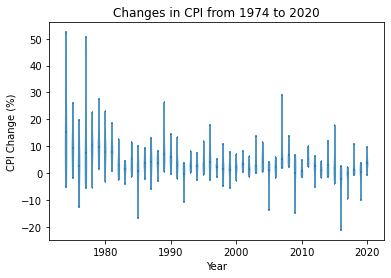

In [9]:
# Creating the violin plot
# list of years
years = list(data_t.index)
# list of lists - each of the sublists are the CPI change for the corresponding year
cpi_year = data_t.values.tolist()

fig, ax = plt.subplots()

ax.violinplot(cpi_year,years, widths = .5, showmeans=True)
ax.set_xlabel("Year")
ax.set_ylabel("CPI Change (%)")
ax.set_title("Changes in CPI from 1974 to 2020")

Note that our graph starts from 1999 and not 1974, since "Processed fruits and vegetables" have N/A values up till 1998. 

There does not seem to be any major shift in the overall CPI changes over time. Since these values represents changes in CPI, the price of food generally has steadily increase, though this could easily be attributed to inflation over time. We will next look at each of the food types to see how they have changed over time.

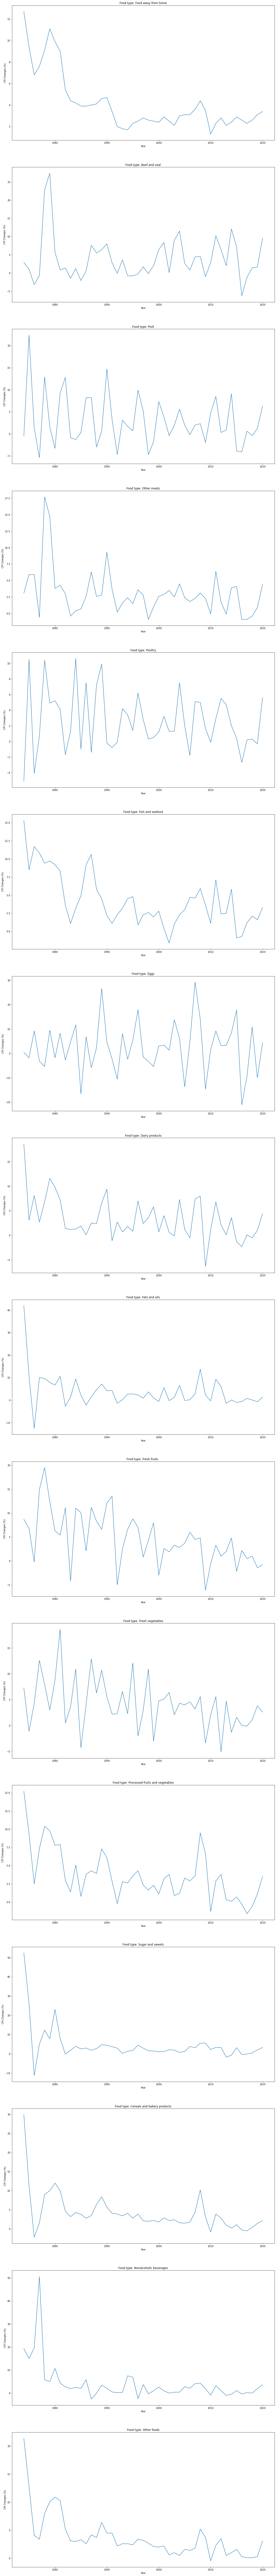

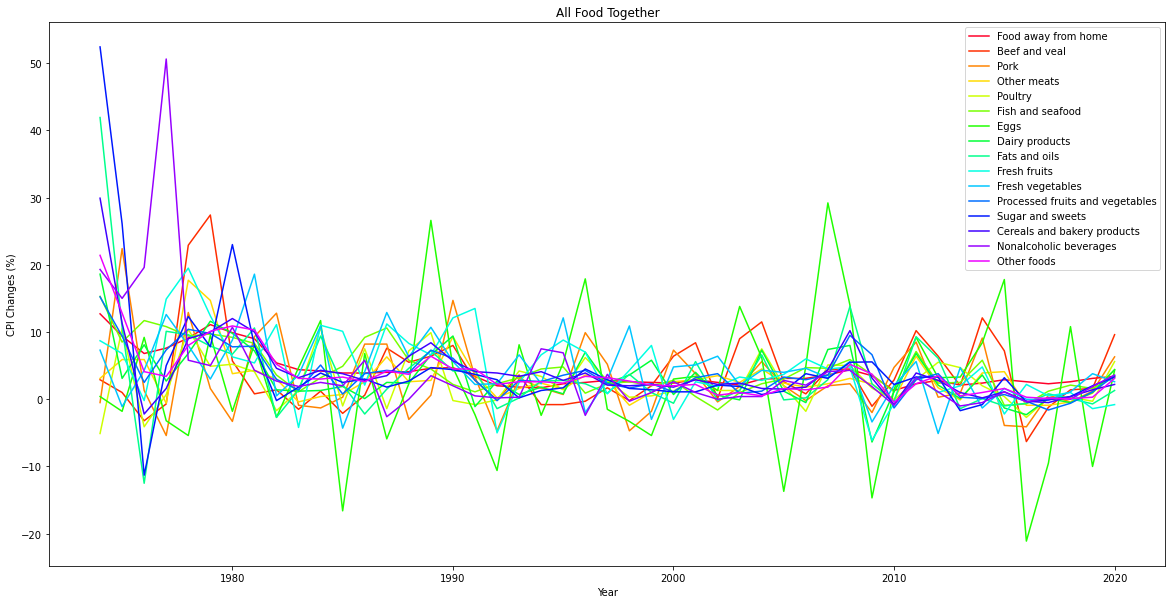

In [10]:
figure, axis = plt.subplots(len(data_t.columns), figsize = (20,200))
for i, col in enumerate(data_t.columns):
    axis[i].plot(data_t.index, data_t[col])
    axis[i].set_title(f'Food type: {col}')
    axis[i].set_xlabel('Year')
    axis[i].set_ylabel('CPI Changes (%)')

# Plotting all of the changes on one graph
NUM_COLORS = len(data_t.columns)
cm = plt.get_cmap('gist_rainbow')
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_prop_cycle(color = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for col in data_t.columns:
    plt.plot(data_t.index, data_t[col], label = col)
plt.title(f'All Food Together')
plt.xlabel('Year')
plt.ylabel('CPI Changes (%)')
plt.legend()

In many of the previous graphs, the changes were very large in the late 1900s before decreasing going into the early 2000s. The graphs also showcase many dynamic changes, constantly fluctuating between positive and negative values for some of the CPI changes. Although, the data is a bit unclear since the colors on the combined graph are similar, if we look at the graph for "All food", CPI change reamined positive with spikes in the late 1970s, late 1980s, and late 2000s.

What would this look like from an absolute CPI perspective - what does the absolute change in food pirce look like? To answer this, we will assume that the price for any food starts at 1 right before 1974 and see how the absolute price for each of the food changes over time.

      Food away from home  Beef and veal      Pork  Other meats   Poultry  \
1974             1.127000       1.029000  0.995000     1.031000  0.949000   
1975             1.232938       1.039290  1.217880     1.091829  1.048645   
1976             1.316778       1.006033  1.233712     1.156247  1.005651   
1977             1.416853       0.998990  1.167092     1.149309  1.012690   
1978             1.545787       1.227759  1.317647     1.352737  1.118010   

      Fish and seafood      Eggs  Dairy products  Fats and oils  \
1974          1.153000  1.004000        1.186000       1.419000   
1975          1.251005  0.985928        1.222766       1.570833   
1976          1.397373  1.076633        1.321810       1.374479   
1977          1.548289  1.042181        1.357499       1.513301   
1978          1.693828  0.985903        1.449809       1.658578   

      Fresh fruits    Fresh vegetables  Processed fruits and vegetables  \
1974        1.087000          1.073000                     

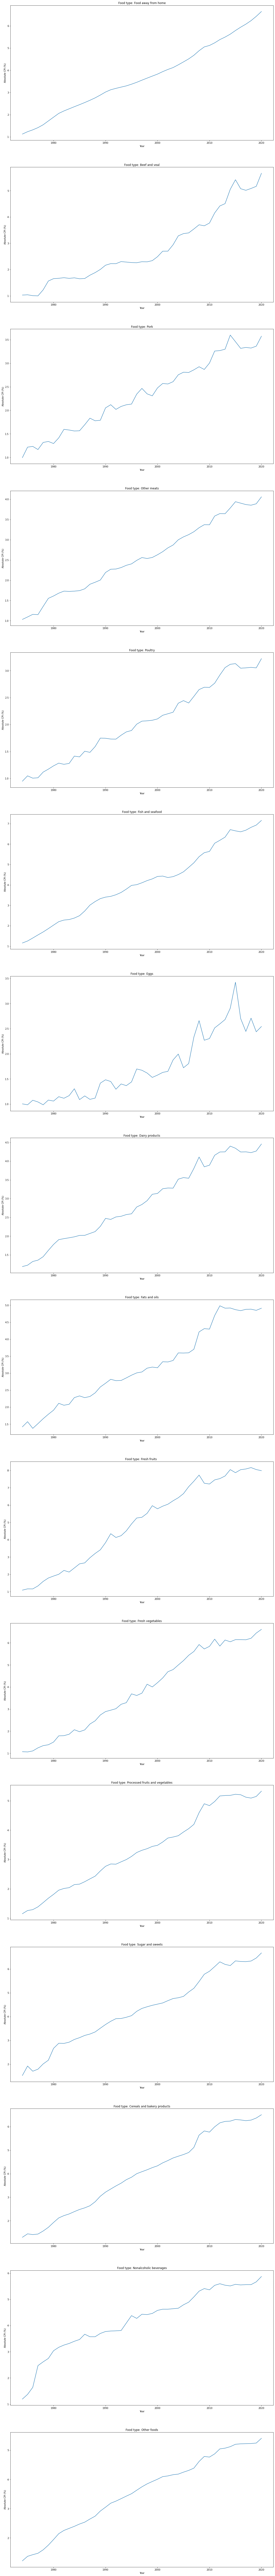

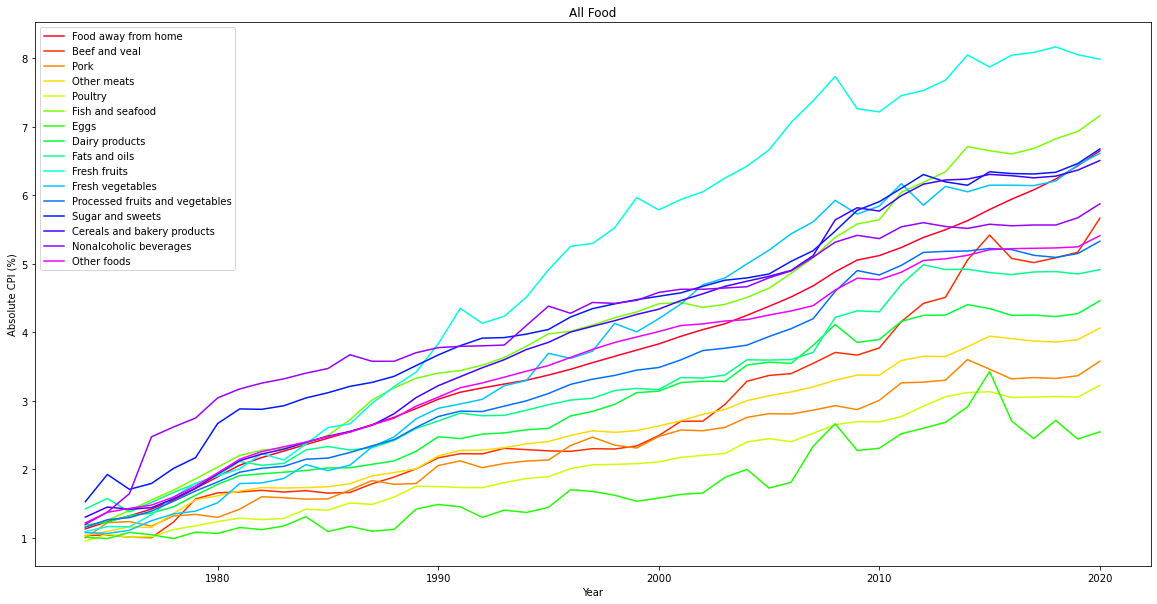

In [11]:
abs_data = pd.DataFrame()
figure, axis = plt.subplots(len(data_t.columns), figsize = (20,200))
for i, col in enumerate(data_t.columns):
    curr_val = 1
    values = []
    for val in data_t[col]:
        curr_val = curr_val + curr_val*(val/100)
        values.append(curr_val)
    abs_data[col] = pd.Series(values, index = data_t.index)
    axis[i].plot(abs_data.index, abs_data[col])
    axis[i].set_title(f'Food type: {col}')
    axis[i].set_xlabel('Year')
    axis[i].set_ylabel('Absolute CPI (%)')
# Taking a look at the new data
print(abs_data.head())

# Plotting all of the changes on one graph
NUM_COLORS = len(abs_data.columns)
cm = plt.get_cmap('gist_rainbow')
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_prop_cycle(color = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for col in abs_data.columns:
    plt.plot(abs_data.index, abs_data[col], label = col)
plt.title(f'All Food')
plt.xlabel('Year')
plt.ylabel('Absolute CPI (%)')
plt.legend()

The graphs above corroborate the information given by the earlier graphs, showing how the prices for all foods have been steadily increasing throughout the years, with many of the graphs having a spike around 1990 and 2008, with a shallow dip around the years leading up to 2020. The spike around 2008 could be related to the 2008 global financial crisis, causing food prices to spike up, albeit temporary. The data does not extend long enough to see how the COVID-19 pandemic has affected food prices, but futhur updates to the data can clarify that aspect.

What we can see is that some foods have been increasing in price faster than other foods. Assuming that the foods started at the same price, fresh fruits have been increasing the fastest, followed by fresh fruits and vegetables.

The overall change in food pirce is mostly linear, which shows that although certain events may causes to fluctuate sharply, they overall do not affect the long-term price trends of the food.
# Blah BLAH BLAH BLAH

# Machine Learning and Hypothesis Testing
We mentioned earlier that we wanted to use the data to see if there was any particular change in food prices over time. This will require the use of unsupervised learning, since we want to see if we can differentiate between the food groups. 

We will be using linear regression

Maybe if we looked at whether certain food groups increases at the same rate?
We can also look at residuals that are present to see how accurate/precise our model is.

If we want to, there can be some way we can classify the residuals so that we can split them into correct/incorrect and then calculate precision/recall/F1 on them.